# Annotation Experiment
## Annotating 23 papers with 'cancer' in their title
***
***


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# cleaned up version of the raw annotation scheme
df_cleaned_cancer = pd.read_csv('/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/databases/anno_cancer_cleaned.csv',
                                delimiter=';', on_bad_lines='skip', header=0, encoding='utf-8')
df_cleaned_cancer.head()

,index,Title,Authors,Page numbers,DOI,Year of publication,Part of publication,Organ,Demographic data,No. datasets,Sex-specfic cancer
0,443,ALL-IN: A Local GLobal Graph-Based DIstillatio...,"Puria Azadi, Jonathan Suderman, Ramin Nakhli, ...",765-775,10.1007/978-3-031-43987-2_74,2023,6,prostate gland,0,3,1
1,496,Anatomy-Informed Data Augmentation for Enhance...,"Balint Kovacs, Nils Netzer, Michael Baumgartne...",531-540,10.1007/978-3-031-43990-2_50,2023,7,prostate gland,0,1,1
2,486,Automated CT Lung Cancer Screening Workflow Us...,"Brian Teixeira, Vivek Singh, Birgi Tamersoy, A...",423-431,10.1007/978-3-031-43990-2_40,2023,7,lungs,1,2,0
3,328,CARL: Cross-Aligned Representation Learning fo...,"Yin Luo, Wei Liu, Tao Fang, Qilong Song, Xuhon...",358-367,10.1007/978-3-031-43904-9_35,2023,5,lungs,0,2,0
4,92,Centroid-Aware Feature Recalibration for Cance...,"Jaeung Lee, Keunho Byeon, Jin Tae Kwak",212-221,10.1007/978-3-031-43895-0_20,2023,2,colorectal,0,2,0


In [5]:
# 23 papers in total, 
df_cleaned_cancer.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   index                23 non-null     int64 
 1   Title                23 non-null     object
 2   Authors              23 non-null     object
 3   Page numbers         23 non-null     object
 4   DOI                  23 non-null     object
 5   Year of publication  23 non-null     int64 
 6   Part of publication  23 non-null     int64 
 7   Organ                23 non-null     object
 8   Demographic data     23 non-null     int64 
 9   No. datasets         23 non-null     int64 
 10  Sex-specfic cancer   23 non-null     int64 
dtypes: int64(6), object(5)
memory usage: 2.1+ KB


In [9]:
print('Distribution in papers:',df_cleaned_cancer['Organ'].value_counts()) 


Distribution in papers: Organ
breast tissue            5
colorectal               3
prostate gland           2
lungs                    2
breast                   2
stomach                  1
tissue                   1
cervix                   1
oropharynx tissue        1
gall bladder             1
pancreas                 1
head and neck            1
thyroid gland tissues    1
lung tissue              1
Name: count, dtype: int64


In [40]:
# Replace 'breast' with 'breast tissue' in the 'Organ' column
df_cleaned_cancer['Organ'] = df_cleaned_cancer['Organ'].replace('breast', 'breast tissue')

print('Distribution in papers:',df_cleaned_cancer['Organ'].value_counts()) 


Distribution in papers: Organ
breast tissue            7
colorectal               3
prostate gland           2
lungs                    2
stomach                  1
tissue                   1
cervix                   1
oropharynx tissue        1
gall bladder             1
pancreas                 1
head and neck            1
thyroid gland tissues    1
lung tissue              1
Name: count, dtype: int64


In [14]:
# problem: duplicated row is not recognized as duplicated, interrupting the analysis/value counts

print('Distribution in papers:',df_cleaned_cancer['Demographic data'].value_counts()) 
# 0    15 (no demographic data in 18 papers)
# 1     8 (demographic data in 5 papers)


Distribution in papers: Demographic data
0    15
1     8
Name: count, dtype: int64


In [15]:
# problem: duplicated row is not recognized as duplicated, interrupting the analysis/value counts

print('Distribution in papers:',df_cleaned_cancer['Sex-specfic cancer'].value_counts()) 
# 0    20 (22 papers working with none sex specific cancer)
# 1     3 (3 paper working with sex specific cancer)


Distribution in papers: Sex-specfic cancer
0    20
1     3
Name: count, dtype: int64


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_value_counts(value_counts_series, title='Value Counts', xlabel='Category', ylabel='Counts'):
    """
    Visualize the output of pandas value_counts().

    Parameters:
    - value_counts_series: pandas Series obtained from value_counts().
    - title: Title of the plot.
    - xlabel: Label for the x-axis.
    - ylabel: Label for the y-axis.
    """
    # Using seaborn's barplot for an enhanced visual appearance (optional)
    sns.barplot(x=value_counts_series.index, y=value_counts_series.values)
    
    # Basic matplotlib approach
    # plt.bar(value_counts_series.index, value_counts_series.values)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)  # Rotate labels to make them readable
    plt.tight_layout()  # Adjust layout to not cut off labels
    plt.show()



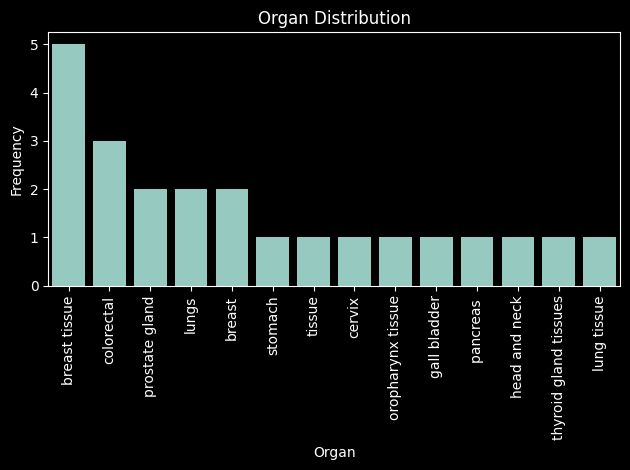

In [25]:
plot_value_counts(df_cleaned_cancer['Organ'].value_counts(), title='Organ Distribution', xlabel='Organ', ylabel='Frequency')

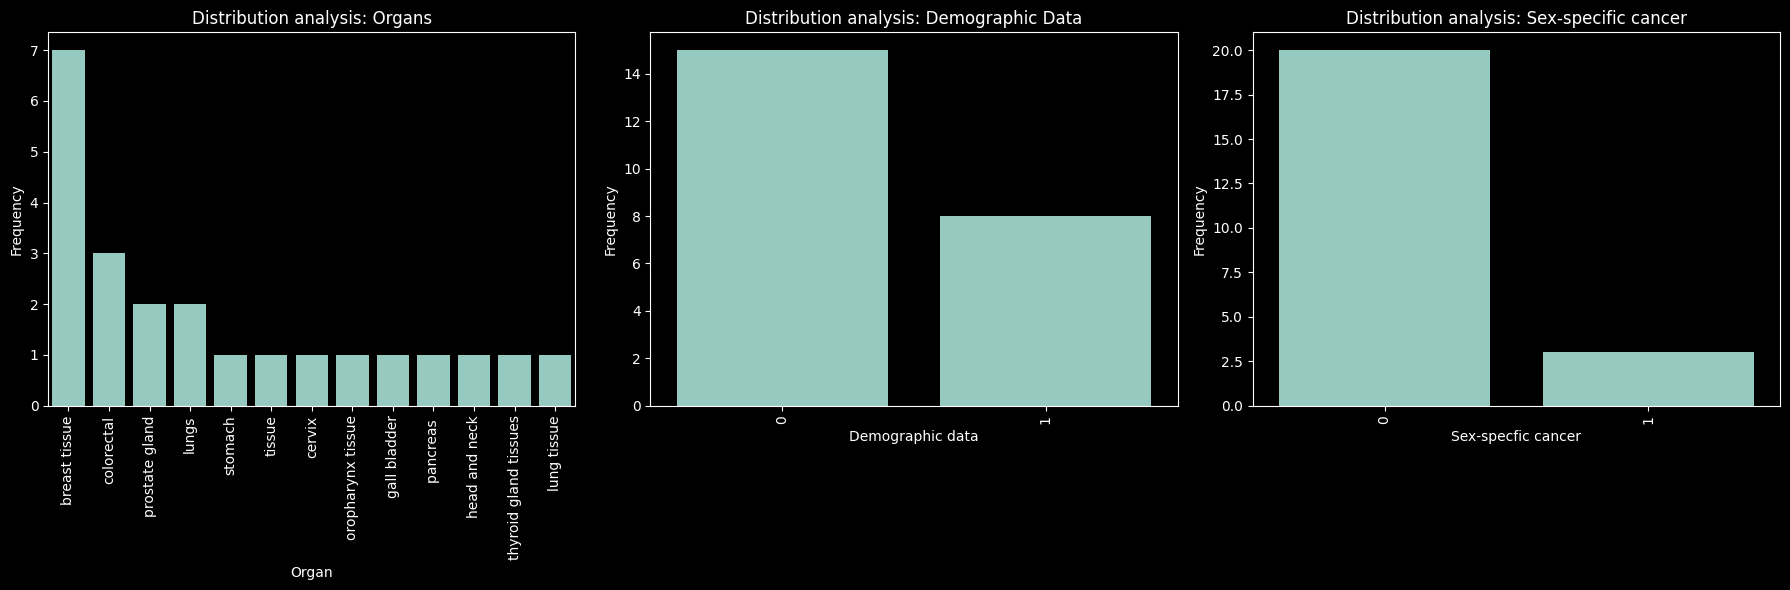

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_multiple_value_counts(value_counts_list, titles=None, ylabel='Counts', ncols=3):
    """
    Visualize multiple pandas value_counts() outputs as subplots.

    Parameters:
    - value_counts_list: List of pandas Series obtained from value_counts().
    - titles: List of titles for each subplot. If None, defaults to 'Value Counts'.
    - xlabel: Label for the x-axis (applied to all subplots).
    - ylabel: Label for the y-axis (applied to all subplots).
    - ncols: Number of columns in the subplot grid.
    """
    nrows = (len(value_counts_list) + ncols - 1) // ncols  # Calculate the required number of rows
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*6, nrows*6))  # Adjust figsize as needed

    if titles is None:
        titles = ['Value Counts'] * len(value_counts_list)

    for i, value_counts_series in enumerate(value_counts_list):
        if nrows > 1:
            ax = axs[i // ncols, i % ncols]
        else:
            ax = axs[i % ncols]  # For a single row of subplots

        sns.barplot(x=value_counts_series.index, y=value_counts_series.values, ax=ax)
        ax.set_title(titles[i])
        ax.set_ylabel(ylabel)
        ax.tick_params(axis='x', rotation=90)  # Rotate labels to make them readable

    plt.tight_layout()
    plt.show()

# Example usage:
# df1 = pd.DataFrame({'Category': ['A', 'B', 'A', 'C', 'B', 'A', 'D', 'C']})
# df2 = pd.DataFrame({'Type': ['X', 'Y', 'X', 'Z', 'Y', 'X', 'W', 'Z']})

value_counts_list = [df_cleaned_cancer['Organ'].value_counts(), df_cleaned_cancer['Demographic data'].value_counts(), df_cleaned_cancer['Sex-specfic cancer'].value_counts()]
titles = ['Distribution analysis: Organs','Distribution analysis: Demographic Data', 'Distribution analysis: Sex-specific cancer' ]
plot_multiple_value_counts(value_counts_list, titles=titles, ylabel='Frequency', ncols=3)


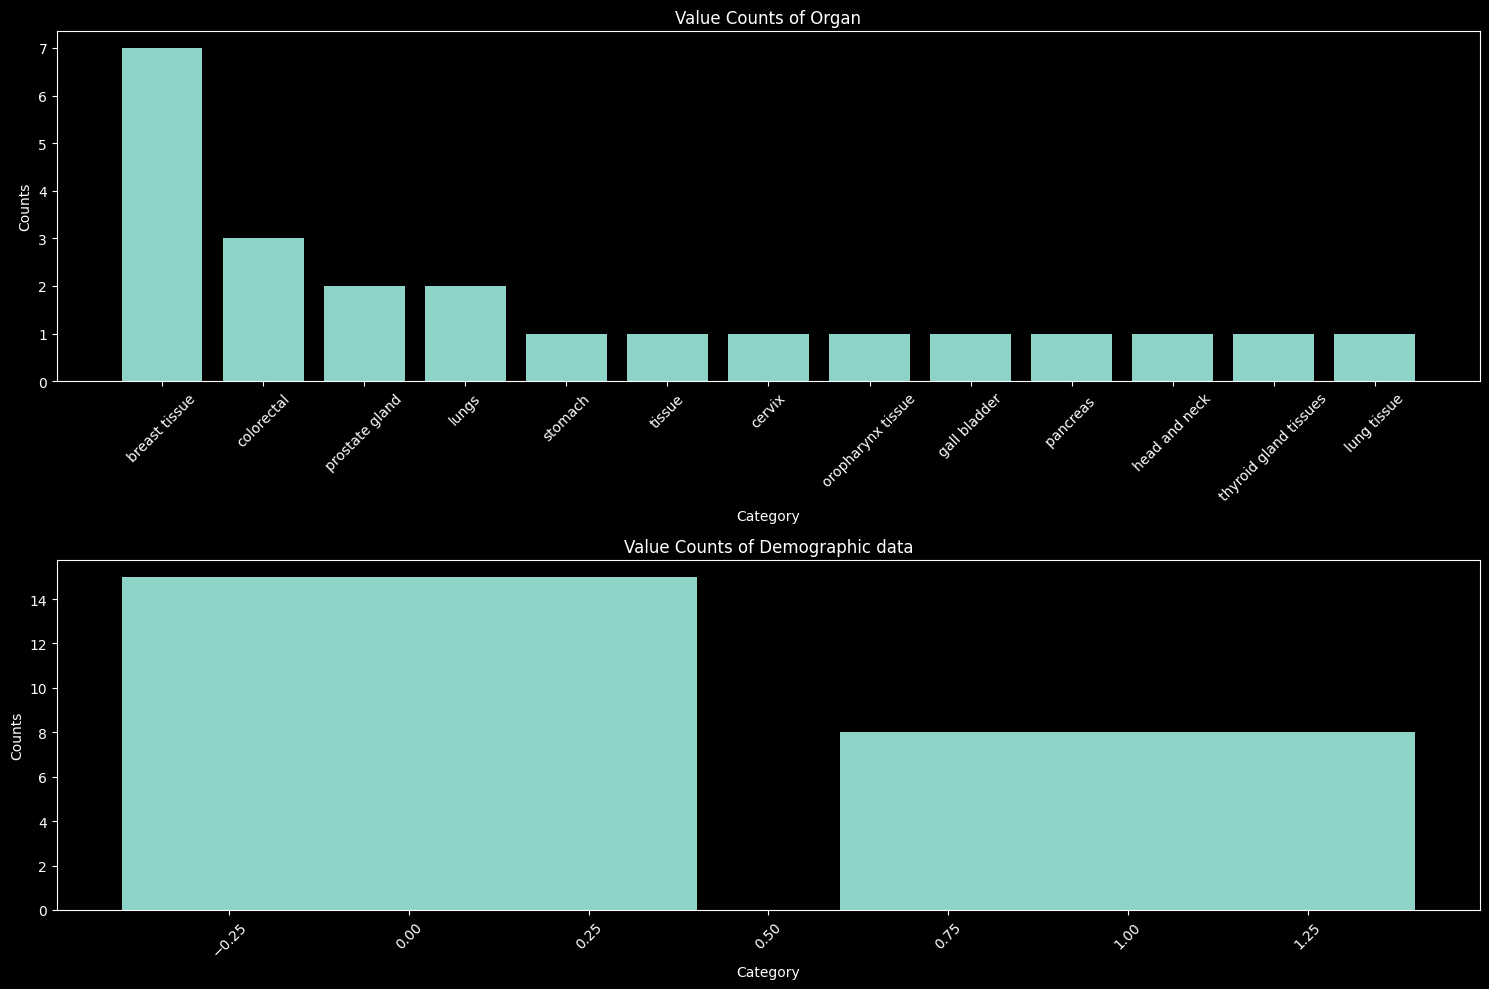

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_multiple_value_counts(dataframe, columns, nrows, ncols, figsize=(15, 10)):
    """
    Plot multiple categories from different value_counts() results in subplots.

    Parameters:
    - dataframe: The pandas DataFrame containing your data.
    - columns: List of column names to plot value_counts() for.
    - nrows, ncols: Number of rows and columns in the subplot grid.
    - figsize: Tuple indicating figure size.
    """
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axs = axs.flatten()  # Flatten in case of a single row/column to simplify indexing
    
    for i, column in enumerate(columns):
        value_counts = dataframe[column].value_counts()
        axs[i].bar(value_counts.index, value_counts.values)
        axs[i].set_title(f'Value Counts of {column}')
        axs[i].set_xlabel('Category')
        axs[i].set_ylabel('Counts')
        axs[i].tick_params(axis='x', rotation=45)  # Rotate labels for better readability
    
    plt.tight_layout()
    plt.show()

# Example usage
# Assuming `df` is your DataFrame and you want to plot value_counts for 'Column1', 'Column2', etc.
# df = pd.DataFrame({
#     'Column1': ['A', 'B', 'A', 'C', 'B', 'A', 'D', 'C'],
#     'Column2': [1, 2, 1, 3, 2, 1, 4, 3],
#     ...
# })
plot_multiple_value_counts(df_cleaned_cancer, ['Organ', 'Demographic data'], nrows=2, ncols=1)
